<font color=darkred>
    
# Example 4-1. CNN with MNIST Data

- Classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9).

In [1]:
from keras.models import Sequential
from keras import layers
from keras.utils import plot_model
from keras import backend as K
from keras.callbacks import EarlyStopping, TensorBoard
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [4]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
test_labels_orig = test_labels

In [6]:
train_images[0].shape

(28, 28)

Label:2


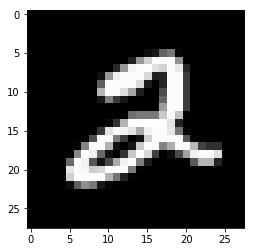

In [9]:
i=5
plt.gray()
plt.imshow(train_images[i])
print('Label:{l}'.format(l=train_labels[i]))

In [10]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
test_labels_orig[0]

7

In [13]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Classifying MNIST with a DNN model

In [14]:
model = Sequential()
model.add(layers.Flatten(input_shape=(28,28,1)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 67us/step - loss: 0.2867 - acc: 0.9179 - val_loss: 0.1506 - val_acc: 0.9551
Epoch 2/5
48000/48000 [==============================] - 2s 36us/step - loss: 0.1174 - acc: 0.9651 - val_loss: 0.1089 - val_acc: 0.9672
Epoch 3/5
48000/48000 [==============================] - 2s 37us/step - loss: 0.0774 - acc: 0.9773 - val_loss: 0.0973 - val_acc: 0.9719
Epoch 4/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.0567 - acc: 0.9837 - val_loss: 0.0859 - val_acc: 0.9742
Epoch 5/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.0416 - acc: 0.9880 - val_loss: 0.0839 - val_acc: 0.9754


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 57us/step


0.9778

## Classifying MNIST with a CNN model

<font color="blue">
    
- TO DO: 아래의 hiddne lahyer를 가진 모형을 구축하고 train set을 사용해 모형을 학습하시오. 위의 DNN 모형과 동일한 epoch, batch_size, optimizer를 사용하여 학습한 뒤 test set에 대한 accuracy를 계산하여 비교하시오.
    - Convolutional: (3,3) kernel,  32 filters, ReLU activation
    - Maxpooling: (2,2) kernel
    - Convolutional: (3,3) kernel,  64 filters, ReLU activation
    - Fully(Densely) connected: 64 units


In [17]:
## Your answer comes here.
K.clear_session()

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)



Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 9s 194us/step - loss: 0.1965 - acc: 0.9399 - val_loss: 0.0652 - val_acc: 0.9815
Epoch 2/5
48000/48000 [==============================] - 3s 68us/step - loss: 0.0537 - acc: 0.9835 - val_loss: 0.0479 - val_acc: 0.9857
Epoch 3/5
48000/48000 [==============================] - 3s 67us/step - loss: 0.0345 - acc: 0.9887 - val_loss: 0.0505 - val_acc: 0.9849
Epoch 4/5
48000/48000 [==============================] - 3s 63us/step - loss: 0.0244 - acc: 0.9921 - val_loss: 0.0409 - val_acc: 0.9882
Epoch 5/5
48000/48000 [==============================] - 2s 50us/step - loss: 0.0179 - acc: 0.9943 - val_loss: 0.0425 - val_acc: 0.9891


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 83us/step


In [22]:
test_acc

0.9906

<font color="blue">
    
- TO DO: 위의 모형을 개선하여 (구조, epoch, optimizer 등의 측면에서) 더 높은 test accuracy를 가지는 모형을 만드시오

In [ ]:
## Your answer comes here.
from keras.callbacks import ModelCheckpoint
import time 
now = time.strftime("%c")


model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks_list = [
    TensorBoard(log_dir='./logs/mnist/'+now),
    #EarlyStopping(monitor='val_loss',patience=2),
    ModelCheckpoint(filepath='./models/mnist.h5',monitor='val_loss',save_best_only=True)
]

model.fit(train_images, train_labels, epochs=100, batch_size=128, validation_split=0.2, callbacks=callbacks_list)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 70us/step - loss: 0.3087 - acc: 0.9022 - val_loss: 0.0735 - val_acc: 0.9778
Epoch 2/100
48000/48000 [==============================] - 3s 62us/step - loss: 0.0764 - acc: 0.9759 - val_loss: 0.0469 - val_acc: 0.9853
Epoch 3/100
48000/48000 [==============================] - 3s 62us/step - loss: 0.0515 - acc: 0.9830 - val_loss: 0.0362 - val_acc: 0.9893
Epoch 4/100
48000/48000 [==============================] - 3s 63us/step - loss: 0.0418 - acc: 0.9870 - val_loss: 0.0419 - val_acc: 0.9871
Epoch 5/100
48000/48000 [==============================] - 3s 62us/step - loss: 0.0349 - acc: 0.9888 - val_loss: 0.0360 - val_acc: 0.9897
Epoch 6/100
48000/48000 [==============================] - 3s 63us/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.0328 - val_acc: 0.9902
Epoch 7

In [25]:
from keras.models import load_model
model2 = load_model("./models/mnist.h5")
test_loss, test_acc = model2.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 93us/step


0.9937

### prediction error가 발생한 example 확인 

In [26]:

test_pred = model2.predict(test_images)
label_pred = test_pred.argmax(axis=1)
error_idx = np.where(np.not_equal(label_pred, test_labels_orig))[0]

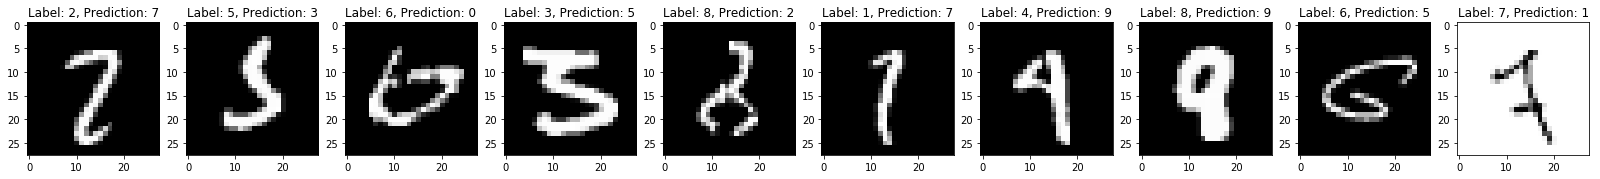

In [30]:
f = plt.figure(figsize=(28,28));
count=1
for i in range(10):
    idx = error_idx[i]
    imarray = np.squeeze(test_images[idx])
    plt.gray()
    plt.subplot(1,10,count)
    plt.subplots_adjust(hspace=0.5)
    count += 1
    plt.title("Label: {}, Prediction: {}".format(np.argmax(test_labels[idx]), label_pred[idx]))
    plt.imshow(imarray, cmap='Greys', interpolation='None')
    
    pass